<a href="https://colab.research.google.com/github/951237/ai_graduate/blob/master/210628_%EB%8C%80%ED%95%99%EC%9B%90_2%ED%95%99%EA%B8%B0_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%ED%80%B4%EC%A6%8802_%EA%B7%B8%EB%9E%98%EB%94%94%EC%96%B8%ED%8A%B8_%EB%B6%80%EC%8A%A4%ED%8C%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 210628_그래디언트 부스팅 learning-rate바꿔가며 점수 확인하기

In [3]:
# 데이터 셋 불러오기
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split # 훈련 테스트셋 나누기 
wine = pd.read_csv('https://bit.ly/wine-date')
wine.columns

Index(['alcohol', 'sugar', 'pH', 'class'], dtype='object')

In [4]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy() # 속성 넘파이로 변환
target = wine[['class']].to_numpy() # 와인결과 넘파이로 변환
# 트레인세트와 테스트셋 나누기
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

In [5]:
# 그래디언트 부스팅으로 와인데이터셋 교차 검증 하기
from sklearn.model_selection import cross_validate
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state = 42)
score = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=1)
print(np.mean(score['train_score']), np.mean(score['test_score']))

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

0.8881086892152563 0.8720430147331015


In [7]:
# learn_rate에 따른 훈련 세트와 테스트 세트 성능 저장하기
np_train_score = []
np_test_score = []
for i in np.arange(0.001, 0.1, 0.002):
    gb = GradientBoostingClassifier(learning_rate=i ,random_state = 42)
    score = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=1)
    np_train_score.append(np.mean(score['train_score']))
    np_test_score.append(np.mean(score['test_score']))

print(np_train_score, np_test_score)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

[0.7579372773984272, 0.7579372773984272, 0.7579372773984272, 0.7981527359925243, 0.8353864544386556, 0.8551091982172088, 0.862854046496096, 0.865595876517214, 0.8657882882804702, 0.8666060353815948, 0.8674718709599635, 0.8688186838776206, 0.8695402887368247, 0.8707910982628327, 0.8718012455563574, 0.8728595854648296, 0.8732443395662063, 0.8741584024720902, 0.8753128499099152, 0.876082601100643, 0.8764193014373433, 0.8772370601093238, 0.8772852180117034, 0.8771889484903678, 0.878247276827984, 0.8786802235443082, 0.8787764120696524, 0.8791131008354969, 0.879401712694953, 0.8801232596998775, 0.8809411225095612, 0.8814221461322737, 0.8826247746141902, 0.8819512698030859, 0.8824323049966543, 0.8838273568126827, 0.8846451270555191, 0.8842603729541425, 0.8841159455304272, 0.8848374809644957, 0.8845008500529309, 0.8847894387706752, 0.8858958093021119, 0.8861364136803154, 0.8859438977793561, 0.8864250718231956, 0.8869059565956368, 0.8873870496434846, 0.8877238078344647, 0.8869060144499162] [0.7

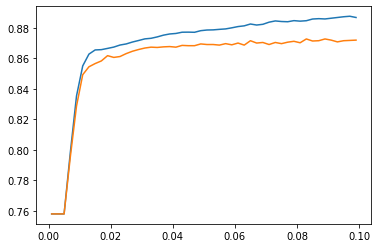

In [8]:
# learn_rate에 따른 훈련세트와 테스트 세트 점수 그래프로 나타내기
import matplotlib.pyplot as plt
x = np.arange(0.001, 0.1, 0.002)
plt.plot(x,np_train_score)
plt.plot(x,np_test_score)
plt.show()

# 210628_혼동 행렬로 그래디언트 부스팅 성능 측정하기

In [9]:
# 훈련데이터 오차행렬 출력
from sklearn.model_selection import cross_validate # 교차비교
from sklearn.ensemble import GradientBoostingClassifier # 그래디언트 부스팅
from sklearn.metrics import confusion_matrix # 혼동행렬 라이브러리
gb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.004, random_state = 42)
gb.fit(train_input, train_target)
train_pred = gb.predict(train_input)
train_confusion = confusion_matrix(train_target, train_pred, labels=[1,0])
print("훈련데이터 오차행렬:\n", train_confusion)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


훈련데이터 오차행렬:
 [[3692  247]
 [ 449  809]]


In [10]:
# 테스트데이터 오차행렬 출력
from sklearn.model_selection import cross_validate # 교차비교
from sklearn.ensemble import GradientBoostingClassifier # 그래디언트 부스팅
from sklearn.metrics import confusion_matrix # 혼동행렬 라이브러리
gb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.004, random_state = 42)
gb.fit(test_input, test_target)
test_pred = gb.predict(test_input)
test_confusion = confusion_matrix(test_target, test_pred, labels=[1,0])
print("테스트 데이터 오차행렬:\n", test_confusion)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


테스트 데이터 오차행렬:
 [[909  50]
 [125 216]]


In [14]:
# f1-score출력
from sklearn.metrics import f1_score
f1 = f1_score(test_target, test_pred, average = "micro")
print("f1 score : \n", f1)

f1 score : 
 0.8653846153846154


In [15]:
# 분류예측 레포트 출력
from sklearn.metrics import classification_report
cfreport = classification_report(test_target, test_pred)
print("분류예측 레포트 \n", cfreport)

분류예측 레포트 
               precision    recall  f1-score   support

         0.0       0.81      0.63      0.71       341
         1.0       0.88      0.95      0.91       959

    accuracy                           0.87      1300
   macro avg       0.85      0.79      0.81      1300
weighted avg       0.86      0.87      0.86      1300

